In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
from shapely.geometry import Point
import random

In [77]:
survey = pd.read_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//Edits//HI1539B_C_MERGE_CORRECTED.csv')

geometry = [Point(xy) for xy in zip(survey.X, survey.Y)]
crs = {'init': 'epsg:4326'}
geosurvey = gpd.GeoDataFrame(survey, crs=crs, geometry=geometry)

geosurvey['masked']=0
geosurvey['Prediction']=0

In [78]:
df_copy = geosurvey.copy()

In [79]:
#make empty list/df for selection
selec_df = gpd.GeoDataFrame(columns=['Y', 'X', 'Depth','Selection', 'masked', 'Prediction'])


## Loop 

In [80]:
while len(df_copy) > 0:
    #find lowest value
    min_val= df_copy['Depth'].min()
    print (min_val, "m was selected")

    #reset indexes
    df_copy.reset_index(drop=True, inplace=True)

    #find its location in copysurvey
    places  =  df_copy[df_copy.Depth == min_val].index

    if len(places)> 1:
        pred_index = random.choice(places)
    else:
        pred_index = places[0]
    #print (pred_index)

    # add it as a record to the selection list
    selec_df =selec_df.append(df_copy.iloc[pred_index])

    #create buffer around selected point
    if min_val < 6:
        distance = 0.002
    elif min_val < 15:
        distance = 0.003
    elif min_val <30:
        distance = 0.004
    else:
        distance = 0.006
    #distance = ((min_val-5)/19)*0.006 + 0.001
    polygon = df_copy.iloc[pred_index,5].buffer(distance)

    # delete everything in the buffer & delete the selected sounding
    for index, row in df_copy.iterrows():
        if row['geometry'].within(polygon):
            df_copy.loc[index, 'masked'] = 1

        if index % 100000 == 0:
            print(index)

    df_copy = df_copy[df_copy.masked == 0]

    print(len(df_copy), " data points remaining.")

print("Selection contains ",len(selec_df), " soundings.")


5.69 m was selected
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3365036  data points remaining.
5.787 m was selected
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3355646  data points remaining.
5.898 m was selected
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3348536  data points remaining.
6.552 m was selected
0
100000
200000
300000
400000
500000
600000
700000

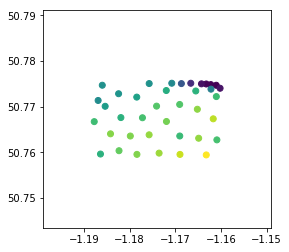

In [81]:
selec_df.plot(column='Depth')
plt.show()

In [82]:
selec_df.to_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//Edits//HI1539B_STEPSELECTION_ifmethod.csv')


In [25]:
min_val= survey['Depth'].min()
min_val

5.6900000000000004

In [27]:
max_val=survey['Depth'].max()
max_val

25.283000000000001

In [28]:
range_dep = max_val - min_val
range_dep

19.593